<a href="https://colab.research.google.com/github/YihanMou0511/Machine-Learning/blob/main/Week_6_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.) Preprocess your data into scaled input variables and an output variable


In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/441B/CLV.csv")


In [ ]:
df

,Unnamed: 0,Customer Lifetime Value,Income,Number of Policies,Total Claim Amount,Months Since Last Claim,Vehicle Size_Large,Vehicle Size_Medsize,Gender_M,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,0,2763.519279,56274,1,384.811147,32,0,1,0,1,0,0,0,1,0,0,1,0
1,1,6979.535903,0,8,1131.464935,13,0,1,0,0,0,0,1,0,1,0,0,1
2,2,12887.431650,48767,2,566.472247,18,0,1,0,1,0,0,0,0,1,0,1,0
3,3,7645.861827,0,7,529.881344,18,0,1,1,0,0,0,1,1,0,0,1,0
4,4,2813.692575,43836,1,138.130879,12,0,1,1,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,23405.987980,71941,2,198.234764,18,0,1,1,1,0,0,0,0,1,0,1,0
9130,9130,3096.511217,21604,1,379.200000,14,0,1,0,1,0,0,0,1,0,1,0,0
9131,9131,8163.890428,0,2,790.784983,9,0,1,1,0,0,0,1,1,0,0,0,1
9132,9132,7524.442436,21941,3,691.200000,34,1,0,1,1,0,0,0,0,1,0,1,0


In [ ]:
X = df.drop(['Customer Lifetime Value','Unnamed: 0'],axis=1)
y = df['Customer Lifetime Value']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

# 2.) Run a GridSearch CV on at least 10 possible combinations of hyper parameters 

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
clf=MLPRegressor()
params={
    'hidden_layer_sizes':[(10,),(5,20,),(10,50,),(10,100,10,)],
    'activation':['relu','logistic','tanh']
}


In [ ]:
grid=GridSearchCV(clf,params, cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=MLPRegressor(),
             param_grid={'activation': ['relu', 'logistic', 'tanh'],
                         'hidden_layer_sizes': [(10,), (5, 20), (10, 50),
                                                (10, 100, 10)]})

In [ ]:
print(grid.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': (10, 100, 10)}


# 3.) Train a model with the optimal solution from GridSearch

In [ ]:
regressor=MLPRegressor(activation='relu', hidden_layer_sizes=(10, 100, 10,))

In [ ]:
regressor.fit(X_train,y_train)

MLPRegressor(hidden_layer_sizes=(10, 100, 10))

# 4.) What are the in-sample and out of sample MSEs

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred_in=regressor.predict(X_train)
y_pred=regressor.predict(X_test)

out_mse=mean_squared_error(y_test,y_pred)
in_mse=mean_squared_error(y_train,y_pred_in)

In [ ]:
print('In-sample MSE:',in_mse)

In-sample MSE: 42141155.45283502


In [ ]:
print('Out-of-sample MSE:',out_mse)

Out-of-sample MSE: 45616113.92014174


# 5.) Build a Keras with the architecture defined by GridSearchCV

In [ ]:
import keras.models
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model=Sequential()
model.add(Dense(10,input_dim=X_train.shape[1],activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='relu'))

In [ ]:
model.compile(loss='mse',optimizer=Adam(lr=0.01))
model.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: 70150360.0000
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 43453372.0000
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 42881932.0000
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 42706352.0000
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 42571284.0000
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 42532256.0000
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 42481696.0000
Epoch 8/100
200/200 [==============================] - 0s 2ms/step - loss: 42447096.0000
Epoch 9/100
200/200 [==============================] - 1s 2ms/step - loss: 42403164.0000
Epoch 10/100
200/200 [==============================] - 0s 2ms/step - loss: 42309440.0000
Epoch 11/100
200/200 [==============================] - 0s 2ms/step - loss: 42367276.0000
Epoch 12/100
200/20

In [ ]:
keras.models.save_model(model,'/Users/mouyihan/study/441B')
mod=keras.models.load_model('/Users/mouyihan/study/441B')

# 6.) Make two visualizations of your NN using “plot_model” and “ann_viz”

In [ ]:
from tensorflow.keras.utils import plot_model

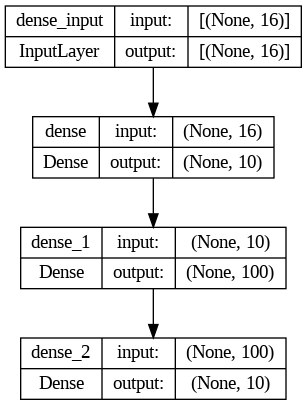

In [ ]:
plot_model(model,show_shapes=True)

In [ ]:
from ann_visualizer.visualize import ann_viz

In [ ]:
ann_viz(model,title='CLV NN Viz', view=True, filename='/Users/mouyihan/study/441B/nn_model.gv')

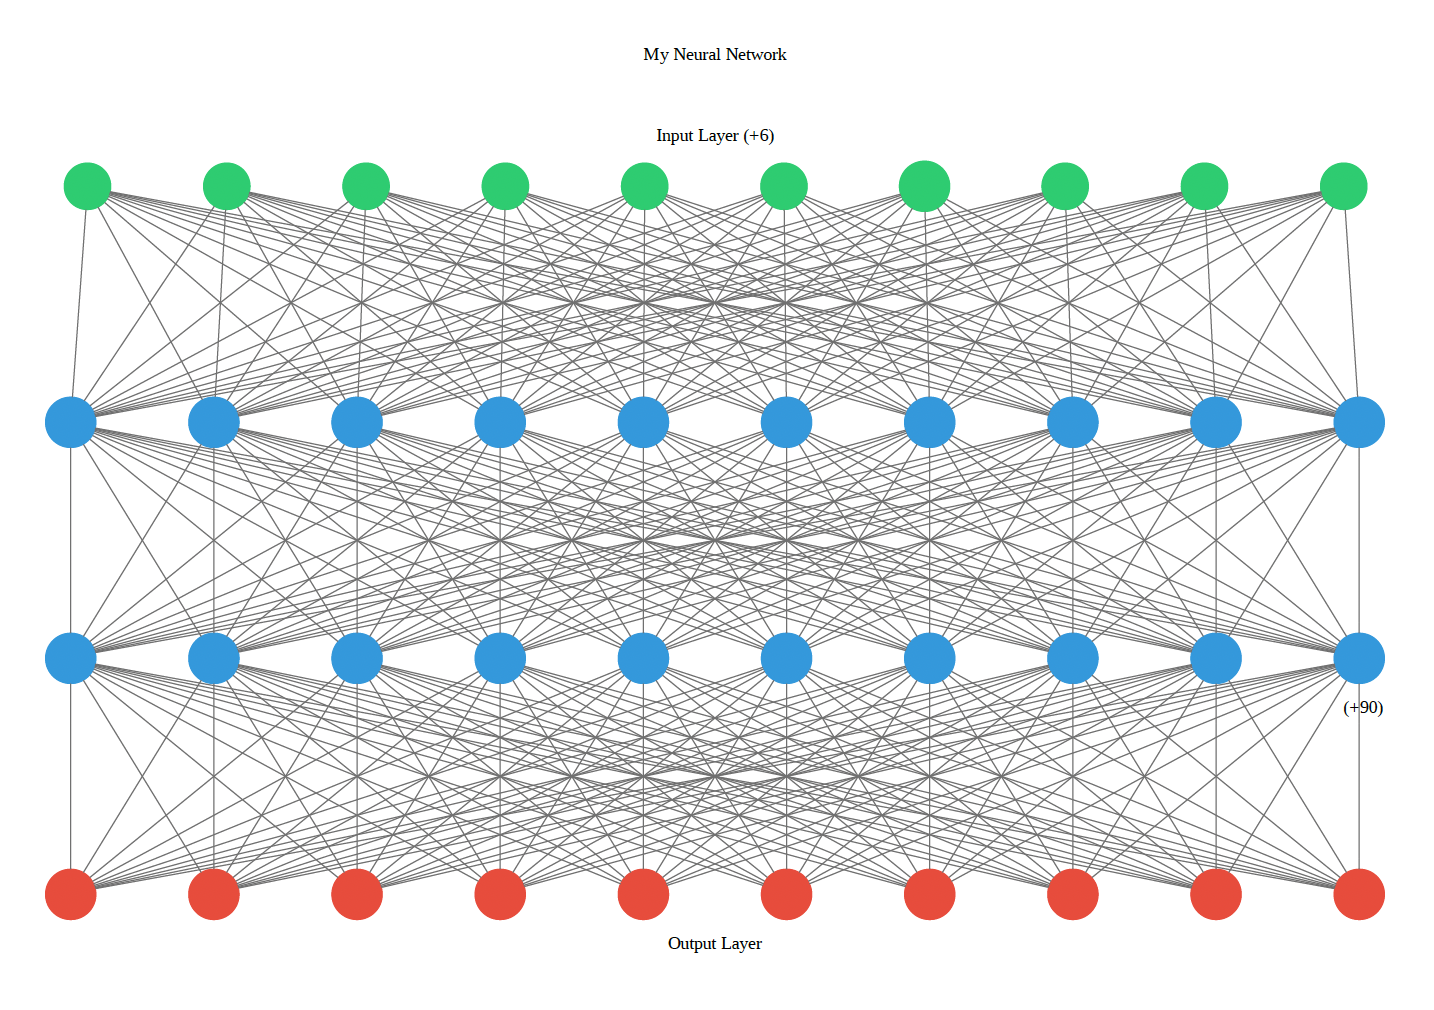